In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from collections import Counter

In [2]:
# 한글 깨짐 예방
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

### 데이터 확인

In [3]:
Amount=pd.read_csv("연령별 거주인구 대비 지역화폐 사용금액 현황.csv", encoding='euc-kr')
Freq=pd.read_csv("연령별 지역화폐 사용 빈도 현황.csv", encoding='euc-kr')

In [4]:
Amount[Amount['Province2']=='가평군']

,Date,Province,Province2,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99,Total
0,2019-03-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,0
42,2019-04-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,1753308
84,2019-05-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,19699832
126,2019-06-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,42171318
168,2019-07-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,50282046
210,2019-08-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,59414003
252,2019-09-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,127960013


In [5]:
Amount.head(10)

,Date,Province,Province2,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99,Total
0,2019-03-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,0
1,2019-03-01,경기도,고양시 덕양구,466157,38863,42557,62288,66204,78358,81204,51362,29459,13765,1900,0
2,2019-03-01,경기도,고양시 일산동구,297671,21857,30872,44502,38563,52855,54813,29483,15174,8245,1247,0
3,2019-03-01,경기도,고양시 일산서구,302523,24093,35571,42890,36850,54307,55106,28138,15636,8720,1160,0
4,2019-03-01,경기도,과천시,58289,4507,6366,8023,7806,9209,10278,6498,3457,1740,356,0
5,2019-03-01,경기도,광명시,316552,25724,33063,40950,45227,55010,52573,37128,18178,7485,1074,0
6,2019-03-01,경기도,광주시,372654,36223,33577,43885,59830,64543,61520,43558,20728,7573,1123,0
7,2019-03-01,경기도,구리시,199265,16345,19116,27505,27578,33603,35905,22583,11399,4555,604,0
8,2019-03-01,경기도,군포시,275852,22602,28069,38214,39877,45760,48316,30212,14536,7098,1100,0
9,2019-03-01,경기도,김포시,437221,52071,44797,47422,71134,80358,62744,43857,23886,9519,1367,0


In [6]:
Freq.head(10)

,Date,Province,Province2,Age,Category,Frequency
0,2019.3.1,경기도,양주시,40,양주사랑카드,3
1,2019.4.1,경기도,가평군,50,가평사랑상품권,85
2,2019.4.1,경기도,가평군,30,가평사랑상품권,37
3,2019.4.1,경기도,가평군,40,가평사랑상품권,23
4,2019.4.1,경기도,가평군,20,가평사랑상품권,3
5,2019.4.1,경기도,가평군,60,가평사랑상품권,2
6,2019.4.1,경기도,가평군,40,오산화폐 오색전,1
7,2019.4.1,경기도,가평군,60,고양페이카드,1
8,2019.4.1,경기도,가평군,60,수원페이,1
9,2019.4.1,경기도,고양시 덕양구,20,고양페이카드,21


### 연령대별 인구수 그래프

In [7]:
import seaborn as sns

In [8]:
시군구별총금액 = pd.read_csv('시군구별총금액.csv')
AD=시군구별총금액[['0~9','10~19','20~29','30~39','40~49','50~59','60~69','70~79','80~89','90~99']]

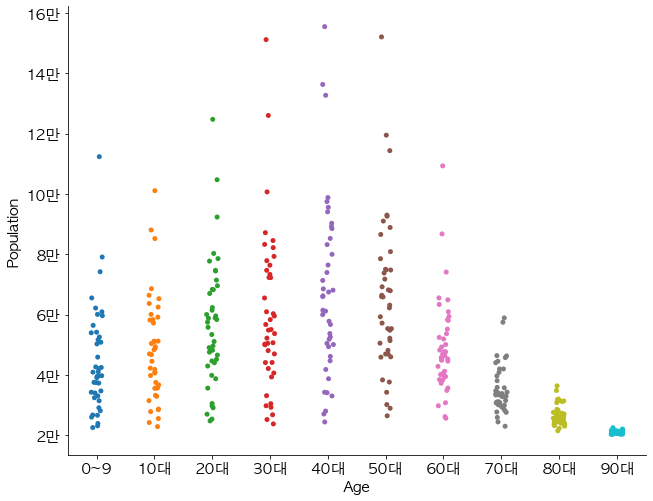

In [9]:
#연령별 인구수 그래프
fig=sns.catplot(data=AD,orient="v")
fig.fig.set_size_inches(10,7)
plt.xticks(np.linspace(0,9,10),['0~9','10대','20대','30대','40대','50대','60대','70대','80대','90대'], size=15)
plt.yticks(np.linspace(0,160000,8),['2만','4만','6만','8만','10만','12만','14만','16만'], size=15)
plt.xlabel('Age', size=15)
plt.ylabel('Population', size=15)
plt.show()

### 시군구 list 및 개수 확인

In [10]:
province2=Amount['Province2']
placeName=[]


def place_name(data):
    x=len(data)
    for name in range(x):
        if data[name] not in placeName:
            placeName.append(data[name])
    return placeName

print(place_name(province2),len(placeName))

['가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구', '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시'] 42


### 시군구별 데이터 셋 분류

In [11]:
가평군=Amount[Amount['Province2']=='가평군']
가평군2=Freq[Freq['Province2']=='가평군']

고양시덕양구=Amount[Amount['Province2']=='고양시 덕양구']
고양시덕양구2=Freq[Freq['Province2']=='고양시 덕양구']

고양시일산동구=Amount[Amount['Province2']=='고양시 일산동구']
고양시일산동구2=Freq[Freq['Province2']=='고양시 일산동구']

고양시일산서구=Amount[Amount['Province2']=='고양시 일산서구']
고양시일산서구2=Freq[Freq['Province2']=='고양시 일산서구']

과천시=Amount[Amount['Province2']=='과천시']
과천시2=Freq[Freq['Province2']=='과천시']

광명시=Amount[Amount['Province2']=='광명시']
광명시2=Freq[Freq['Province2']=='광명시']

광주시=Amount[Amount['Province2']=='광주시']
광주시2=Freq[Freq['Province2']=='광주시']

구리시=Amount[Amount['Province2']=='구리시']
구리시2=Freq[Freq['Province2']=='구리시']

군포시=Amount[Amount['Province2']=='군포시']
군포시2=Freq[Freq['Province2']=='군포시']

김포시=Amount[Amount['Province2']=='김포시']
김포시2=Freq[Freq['Province2']=='김포시']

남양주시=Amount[Amount['Province2']=='남양주시']
남양주시2=Freq[Freq['Province2']=='남양주시']

동두천시=Amount[Amount['Province2']=='동두천시']
동두천시2=Freq[Freq['Province2']=='동두천시']

부천시=Amount[Amount['Province2']=='부천시']
부천시2=Freq[Freq['Province2']=='부천시']

성남시분당구=Amount[Amount['Province2']=='성남시 분당구']
성남시분당구2=Freq[Freq['Province2']=='성남시 분당구']

성남시수정구=Amount[Amount['Province2']=='성남시 수정구']
성남시수정구2=Freq[Freq['Province2']=='성남시 수정구']

성남시중원구=Amount[Amount['Province2']=='성남시 중원구']
성남시중원구2=Freq[Freq['Province2']=='성남시 중원구']

수원시권선구=Amount[Amount['Province2']=='수원시 권선구']
수원시권선구2=Freq[Freq['Province2']=='수원시 권선구']

수원시영통구=Amount[Amount['Province2']=='수원시 영통구']
수원시영통구2=Freq[Freq['Province2']=='수원시 영통구']

수원시장안구=Amount[Amount['Province2']=='수원시 장안구']
수원시장안구2=Freq[Freq['Province2']=='수원시 장안구']

수원시팔달구=Amount[Amount['Province2']=='수원시 팔달구']
수원시팔달구2=Freq[Freq['Province2']=='수원시 팔달구']

시흥시=Amount[Amount['Province2']=='시흥시']
시흥시2=Freq[Freq['Province2']=='시흥시']

안산시단원구=Amount[Amount['Province2']=='안산시 단원구']
안산시단원구2=Freq[Freq['Province2']=='안산시 단원구']

안산시상록구=Amount[Amount['Province2']=='안산시 상록구']
안산시상록구2=Freq[Freq['Province2']=='안산시 상록구']

안성시=Amount[Amount['Province2']=='안성시']
안성시2=Freq[Freq['Province2']=='안성시']

안양시동안구=Amount[Amount['Province2']=='안양시 동안구']
안양시동안구2=Freq[Freq['Province2']=='안양시 동안구']

안양시만안구=Amount[Amount['Province2']=='안양시 만안구']
안양시만안구2=Freq[Freq['Province2']=='안양시 만안구']

양주시=Amount[Amount['Province2']=='양주시']
양주시2=Freq[Freq['Province2']=='양주시']

양평군=Amount[Amount['Province2']=='양평군']
양평군2=Freq[Freq['Province2']=='양평군']

여주시=Amount[Amount['Province2']=='여주시']
여주시2=Freq[Freq['Province2']=='여주시']

연천군=Amount[Amount['Province2']=='연천군']
연천군2=Freq[Freq['Province2']=='연천군']

오산시=Amount[Amount['Province2']=='오산시']
오산시2=Freq[Freq['Province2']=='오산시']

용인시기흥구=Amount[Amount['Province2']=='용인시 기흥구']
용인시기흥구2=Freq[Freq['Province2']=='용인시 기흥구']

용인시수지구=Amount[Amount['Province2']=='용인시 수지구']
용인시수지구2=Freq[Freq['Province2']=='용인시 수지구']

용인시처인구=Amount[Amount['Province2']=='용인시 처인구']
용인시처인구2=Freq[Freq['Province2']=='용인시 처인구']

의왕시=Amount[Amount['Province2']=='의왕시']
의왕시2=Freq[Freq['Province2']=='의왕시']

의정부시=Amount[Amount['Province2']=='의정부시']
의정부시2=Freq[Freq['Province2']=='의정부시']

이천시=Amount[Amount['Province2']=='이천시']
이천시2=Freq[Freq['Province2']=='이천시']

파주시=Amount[Amount['Province2']=='파주시']
파주시2=Freq[Freq['Province2']=='파주시']

평택시=Amount[Amount['Province2']=='평택시']
평택시2=Freq[Freq['Province2']=='평택시']

포천시=Amount[Amount['Province2']=='포천시']
포천시2=Freq[Freq['Province2']=='포천시']

하남시=Amount[Amount['Province2']=='하남시']
하남시2=Freq[Freq['Province2']=='하남시']

화성시=Amount[Amount['Province2']=='화성시']
화성시2=Freq[Freq['Province2']=='화성시']

In [12]:
가평군.head(5) # 입력한 '시군구'에 대한 연령별 사용금액 데이터

,Date,Province,Province2,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99,Total
0,2019-03-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,0
42,2019-04-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,1753308
84,2019-05-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,19699832
126,2019-06-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,42171318
168,2019-07-01,경기도,가평군,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494,50282046


In [13]:
sum(가평군['Total'])

301280520

In [14]:
가평군['Population']

0      62415
42     62415
84     62415
126    62415
168    62415
210    62415
252    62415
Name: Population, dtype: int64

### 지역화폐 종류 list 및 개수 확인

In [15]:
가평군2.head(5) # 입력한 '시군구2'에 대한 연령별 사용빈도 데이터 

,Date,Province,Province2,Age,Category,Frequency
1,2019.4.1,경기도,가평군,50,가평사랑상품권,85
2,2019.4.1,경기도,가평군,30,가평사랑상품권,37
3,2019.4.1,경기도,가평군,40,가평사랑상품권,23
4,2019.4.1,경기도,가평군,20,가평사랑상품권,3
5,2019.4.1,경기도,가평군,60,가평사랑상품권,2


In [16]:
Categ=Freq['Category']
Categ_list=[]
def place_name(data):
    x=len(data)
    for name in range(x):
        if data[name] not in Categ_list:
            Categ_list.append(data[name])
    return Categ_list
        
print(place_name(Categ),len(Categ_list))

['양주사랑카드', '가평사랑상품권', '오산화폐 오색전', '고양페이카드', '수원페이', '안산사랑상품권 다온', '과천화폐 과천토리', '의정부사랑카드', '용인와이페이', '부천페이', 'Thank You Pay-N', '파주 Pay(파주페이)', '행복화성지역화폐', '광명사랑화폐', '여주사랑카드', '하남하머니', '광주사랑카드', '양평통보', '군포愛머니', '동두천사랑카드', '이천사랑지역화폐', '안성사랑카드', '구리사랑카드', '연천사랑상품권', '행복화성지역화폐_화이트', '양평농협 창립50주년 기프트카드'] 26


### 시군구별 총 사용금액

In [17]:
가평군금액=sum(가평군['Total'])
가평군인구=list(가평군['Population'])[0]

고양시덕양구금액=sum(고양시덕양구['Total'])
고양시덕양구인구=list(고양시덕양구['Population'])[0]

고양시일산동구금액=sum(고양시일산동구['Total'])
고양시일산동구인구=list(고양시일산동구['Population'])[0]

고양시일산서구금액=sum(고양시일산서구['Total'])
고양시일산서구인구=list(고양시일산서구['Population'])[0]

과천시금액=sum(과천시['Total'])
과천시인구=list(과천시['Population'])[0]

광명시금액=sum(광명시['Total'])
광명시인구=list(광명시['Population'])[0]

광주시금액=sum(광주시['Total'])
광주시인구=list(광주시['Population'])[0]

구리시금액=sum(구리시['Total'])
구리시인구=list(구리시['Population'])[0]

군포시금액=sum(군포시['Total'])
군포시인구=list(군포시['Population'])[0]

김포시금액=sum(김포시['Total'])
김포시인구=list(김포시['Population'])[0]

남양주시금액=sum(남양주시['Total'])
남양주시인구=list(남양주시['Population'])[0]

동두천시금액=sum(동두천시['Total'])
동두천시인구=list(동두천시['Population'])[0]

부천시금액=sum(부천시['Total'])
부천시인구=list(부천시['Population'])[0]

성남시분당구금액=sum(성남시분당구['Total'])
성남시분당구인구=list(성남시분당구['Population'])[0]

성남시수정구금액=sum(성남시수정구['Total'])
성남시수정구인구=list(성남시수정구['Population'])[0]

성남시중원구금액=sum(성남시중원구['Total'])
성남시중원구인구=list(성남시중원구['Population'])[0]

수원시권선구금액=sum(수원시권선구['Total'])
수원시권선구인구=list(수원시권선구['Population'])[0]

수원시영통구금액=sum(수원시영통구['Total'])
수원시영통구인구=list(수원시권선구['Population'])[0]

수원시장안구금액=sum(수원시장안구['Total'])
수원시장안구인구=list(수원시장안구['Population'])[0]

수원시팔달구금액=sum(수원시팔달구['Total'])
수원시팔달구인구=list(수원시팔달구['Population'])[0]

시흥시금액=sum(시흥시['Total'])
시흥시인구=list(시흥시['Population'])[0]

안산시단원구금액=sum(안산시단원구['Total'])
안산시단원구인구=list(안산시단원구['Population'])[0]

안산시상록구금액=sum(안산시상록구['Total'])
안산시상록구인구=list(안산시상록구['Population'])[0]

안성시금액=sum(안성시['Total'])
안성시인구=list(안성시['Population'])[0]

안양시동안구금액=sum(안양시동안구['Total'])
안양시동안구인구=list(안양시동안구['Population'])[0]

안양시만안구금액=sum(안양시만안구['Total'])
안양시만안구인구=list(안양시만안구['Population'])[0]

양주시금액=sum(양주시['Total'])
양주시인구=list(양주시['Population'])[0]

양평군금액=sum(양평군['Total'])
양평군인구=list(양평군['Population'])[0]

여주시금액=sum(여주시['Total'])
여주시인구=list(여주시['Population'])[0]

연천군금액=sum(연천군['Total'])
연천군인구=list(연천군['Population'])[0]

오산시금액=sum(오산시['Total'])
오산시인구=list(오산시['Population'])[0]

용인시기흥구금액=sum(용인시기흥구['Total'])
용인시기흥구인구=list(용인시기흥구['Population'])[0]

용인시수지구금액=sum(용인시수지구['Total'])
용인시수지구인구=list(용인시수지구['Population'])[0]

용인시처인구금액=sum(용인시처인구['Total'])
용인시처인구인구=list(용인시처인구['Population'])[0]

의왕시금액=sum(의왕시['Total'])
의왕시인구=list(의왕시['Population'])[0]

의정부시금액=sum(의정부시['Total'])
의정부시인구=list(의정부시['Population'])[0]

이천시금액=sum(이천시['Total'])
이천시인구=list(이천시['Population'])[0]

파주시금액=sum(파주시['Total'])
파주시인구=list(파주시['Population'])[0]

평택시금액=sum(평택시['Total'])
평택시인구=list(평택시['Population'])[0]

포천시금액=sum(포천시['Total'])
포천시인구=list(포천시['Population'])[0]

하남시금액=sum(하남시['Total'])
하남시인구=list(하남시['Population'])[0]

화성시금액=sum(화성시['Total'])
화성시인구=list(화성시['Population'])[0]

### 시군구별 총 사용금액 순위 테이블

In [18]:
시군구별총금액2=시군구별총금액.sort_values(by="Total", ascending=False).groupby("Province",sort=False).head(1)
시군구별총금액2['Total_Rank']=range(1,43)
시군구별총금액2.set_index('Total_Rank',inplace=True)
시군구별총금액2

,Province,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
Total_Rank,,,,,,,,,,,,,
1,부천시,9582969374,829996,61998,74557,119747,121226,132971,150997,102122,44498,18755,2899
2,화성시,6884180679,815396,105609,92720,96872,149961,154886,107896,61875,30105,13536,1824
3,군포시,6482165208,275852,22602,28069,38214,39877,45760,48316,30212,14536,7098,1100
4,하남시,5257854426,272455,29647,23632,32250,46837,47064,40433,31709,14678,5165,936
5,양평군,4295606638,116874,7620,9758,10456,11218,16328,21018,20964,12635,5916,901
6,안산시 단원구,2655181487,306305,22496,32427,48423,42003,52585,59200,30187,12295,5815,822
7,고양시 덕양구,2628753401,466157,38863,42557,62288,66204,78358,81204,51362,29459,13765,1900
8,남양주시,2582027842,701830,67577,77825,82728,92256,128868,113759,76344,42862,17010,2392
9,고양시 일산동구,2205897582,297671,21857,30872,44502,38563,52855,54813,29483,15174,8245,1247


In [19]:
시군구별총금액3=시군구별총금액.sort_values(by="Population", ascending=False).groupby("Province",sort=False).head(1)
시군구별총금액3['Population_Rank']=range(1,43)
시군구별총금액3.set_index('Population_Rank',inplace=True)
시군구별총금액3

,Province,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
Population_Rank,,,,,,,,,,,,,
1,부천시,9582969374,829996,61998,74557,119747,121226,132971,150997,102122,44498,18755,2899
2,화성시,6884180679,815396,105609,92720,96872,149961,154886,107896,61875,30105,13536,1824
3,남양주시,2582027842,701830,67577,77825,82728,92256,128868,113759,76344,42862,17010,2392
4,평택시,1212450,513027,48243,53078,68938,76803,90095,83462,49617,27550,13163,1854
5,성남시 분당구,622100,488005,41685,55571,66982,72353,88598,76120,46825,25176,12402,2219
6,시흥시,1864304,473682,46800,49958,66027,73824,86398,83034,40269,18027,8101,1155
7,고양시 덕양구,2628753401,466157,38863,42557,62288,66204,78358,81204,51362,29459,13765,1900
8,파주시,1187981329,454040,45350,48620,55277,67819,79134,69622,45024,28086,13025,1901
9,의정부시,1914295613,451868,35273,43855,62512,59773,74630,78773,52089,30215,12832,1713


In [20]:
def Olse_two_coef(X,Y):
    n=len(X)
    X=np.array(X)
    Y=np.array(Y)
    m11,m12,m21,m22=sum(X),sum(X*X),n,sum(X)
    vec1,vec2=sum(X*Y),sum(Y)
    First=np.array([[m11,m12],[m21,m22]])
    Second=np.array([vec1,vec2])
    olse=np.matmul(np.linalg.inv(First),Second)
    return olse

def Scat_reg_two_coef(D1,D2):
    plt.figure(figsize=(13, 7))
    plt.scatter(D1,D2,color='b')
    x=range(min(D1)-1000,max(D1)+100000)
    olse=Olse_two_coef(D1,D2)
    y=olse[0]+olse[1]*x
    plt.plot(x,y,'red')
    plt.xticks(np.linspace(0,1000000,6),['0','20만','40만','60만','80만','100만'], size=15)
    plt.yticks(np.linspace(0,10000000000,6),['0','20억','40억','60억','80억','100억'], size=15)
    plt.xlabel('총 인구', size=20)
    plt.ylabel('19년도 총 사용금액', size=20)
    plt.title('인구와 총 사용금액의 상관관계', size=25)
    plt.show()
    
def CORR(DATA1,DATA2):
    X,Y=DATA1,DATA2
    m1,m2=np.mean(X),np.mean(Y)
    s1,s2=np.std(X),np.std(Y)
    Xc=np.array(X)-m1
    Yc=np.array(Y)-m2
    n=len(X)
    L=[]
    for t in range(n):
        num_t=Xc[t]*Yc[t]
        L.append(num_t)
    Num_sum=sum(L)
    ccov=Num_sum/n
    ccor=ccov/s1/s2
    return ccor

### 인구 수와 총 결제금액간의 상관관계

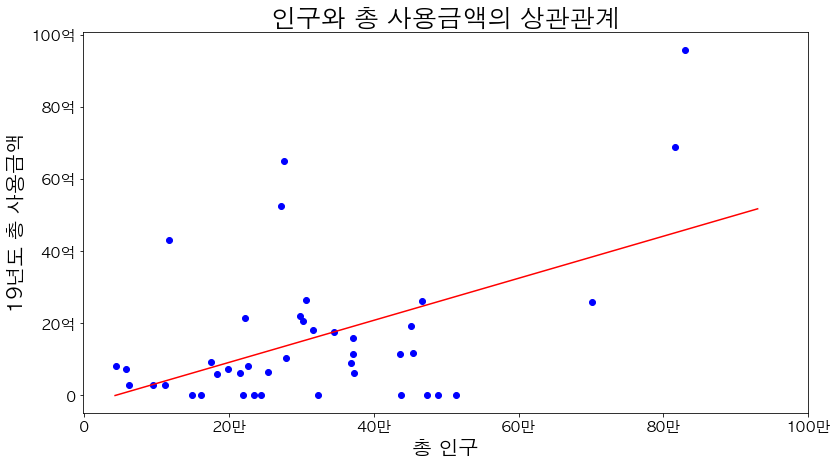

0.506

In [21]:
Pdata=시군구별총금액['Population']
Tdata=시군구별총금액['Total']
Scat_reg_two_coef(Pdata,Tdata)
round(CORR(Pdata,Tdata),3)

### 상위 다섯 지역에 대한 테이블 및 막대 그래프

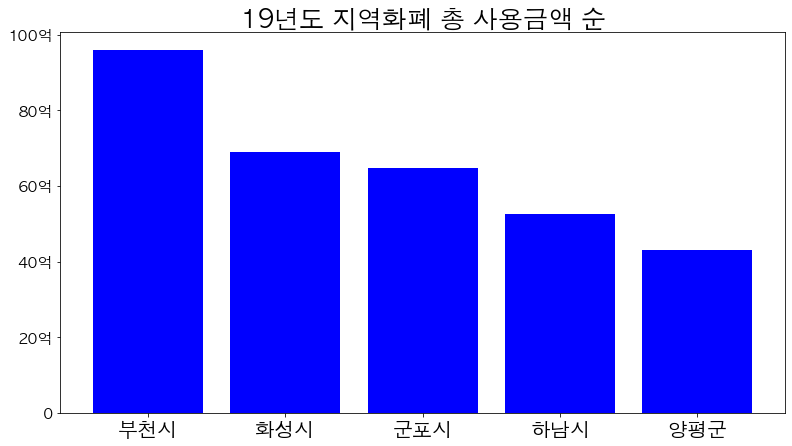

In [75]:
High=시군구별총금액2.head(5)
plt.figure(figsize=(13,7))
plt.title('19년도 지역화폐 총 사용금액 순', size=25)
plt.rc('xtick', labelsize=20)
plt.bar(High['Province'],High['Total'], color='b')
plt.yticks(np.linspace(0,10000000000,6),['0','20억','40억','60억','80억','100억'],size=15)
plt.show()

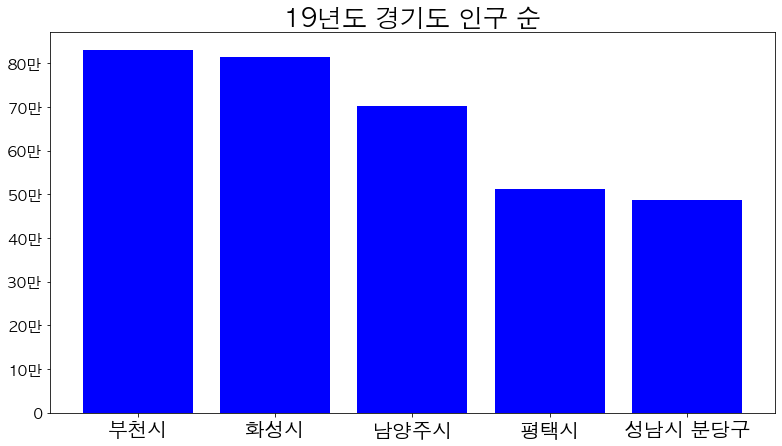

In [85]:
High2=시군구별총금액3.head(5)
plt.figure(figsize=(13,7))
plt.title('19년도 경기도 인구 순', size=25)
plt.rc('xtick', labelsize=20)
plt.bar(High2['Province'],High2['Population'], color='b')
plt.yticks(np.linspace(0,800000,9),['0','10만','20만','30만','40만','50만','60만','70만','80만'],size=15)
plt.show()

In [24]:
# 상위 다섯지역의 사용금액이 경기도 전체 사용금액 중 차지하는 비율
sum(시군구별총금액2[0:5].Total)/sum(시군구별총금액2.Total)

0.4875296921851038

### 지역명을 넣으면 월별 결제금액 추이 그래프를 그려주는 함수

In [81]:
def plot(지역):
    Date=[3,4,5,6,7,8,9]
    Total=지역['Total']
    plt.figure(figsize=(13,7))
    plt.plot(Date,Total, c='b')
    plt.title('19년도 월별 결제금액 추이', size=25)
    plt.rc('xtick', labelsize=15)
    plt.yticks(np.linspace(0,3000000000,7),['0','5억','10억','15억','20억','25억','30억'], size=15)
    plt.xlabel('월', size=20)
    plt.ylabel('사용금액', size=20)
    plt.show()

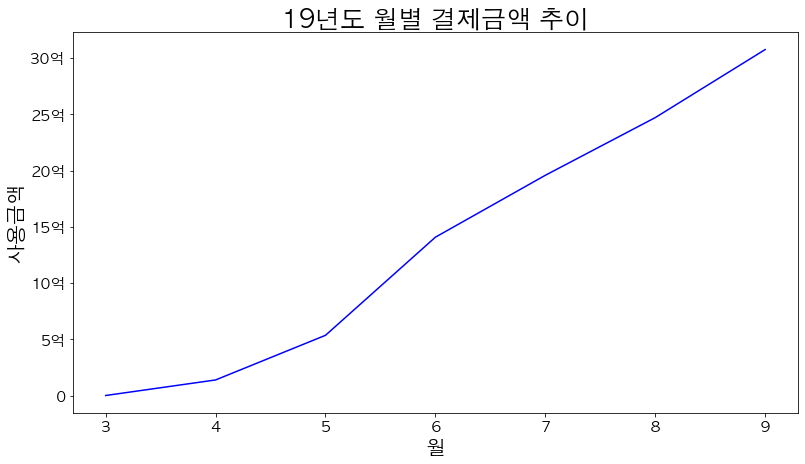

In [82]:
plot(부천시)

###  19년도 총 결제금액 상위 다섯 지역의 월별 결제금액 추이 그래프

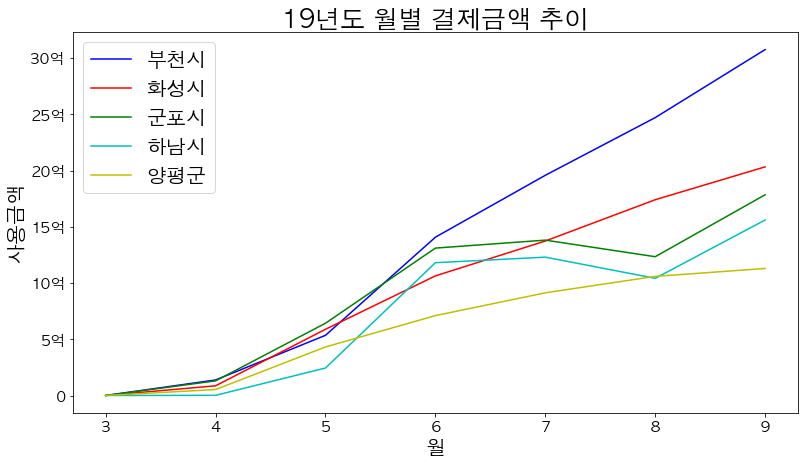

In [27]:
Date=[3,4,5,6,7,8,9]
plt.figure(figsize=(13,7))
plt.rc('legend', fontsize=20) 
plt.plot(Date,부천시['Total'], c='blue', label='부천시')
plt.plot(Date,화성시['Total'], c='red', label='화성시')
plt.plot(Date,군포시['Total'], c='green', label='군포시')
plt.plot(Date,하남시['Total'], c='c', label='하남시')
plt.plot(Date,양평군['Total'], c='y', label='양평군')
plt.title('19년도 월별 결제금액 추이', size=25)
plt.xlabel('월', size=20)
plt.ylabel('사용금액', size=20)
plt.yticks(np.linspace(0,3000000000,7),['0','5억','10억','15억','20억','25억','30억'], size=15)
plt.legend()
plt.show()

### 지역별로 연령대별 지역화폐 사용빈도에 대한 파이그래프

In [28]:
def AGE(data):
    X=data
    n=len(X)
    A10=[]
    A20=[]
    A30=[]
    A40=[]
    A50=[]
    A60=[]
    A70=[]
    A80=[]
    for i in range(n):
        if list(X.Age)[i]==10:
            A10.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==20:
            A20.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==30:
            A30.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==40:
            A40.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==50:
            A50.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==60:
            A60.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==70:
            A70.append(list(data.Frequency)[i])
        elif list(data.Age)[i]==80:
            A80.append(list(data.Frequency)[i])
    return sum(A10),sum(A20),sum(A30),sum(A40),sum(A50),sum(A60),sum(A70),sum(A80)

In [29]:
AGE(부천시2)

(3459, 49636, 120044, 154522, 88309, 28770, 3263, 514)

In [88]:
def Pie_AGE(data):
    plt.figure(figsize=(13,7))
    plt.title("연령대별 지역화폐 사용빈도", size=25)
    plt.pie(AGE(data),labels=['10대','20대','30대','40대','50대','60대','70대','80대'],autopct='%.1f%%')
    plt.show()

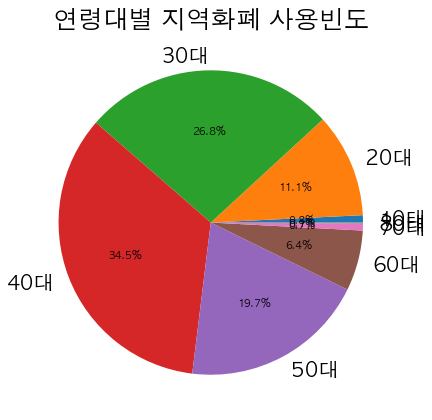

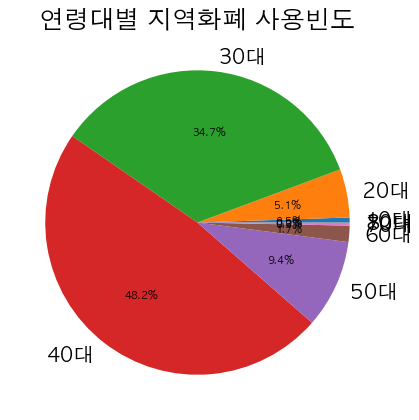

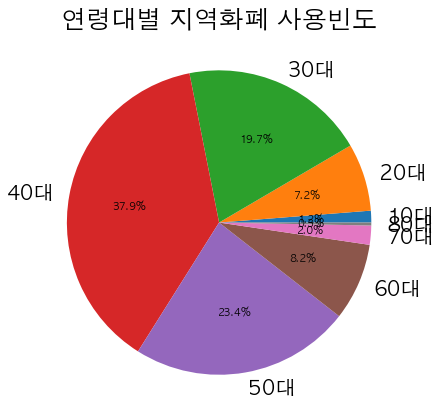

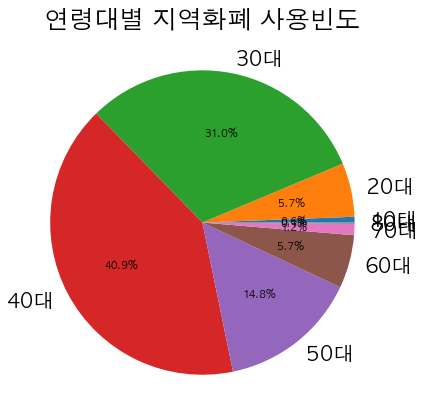

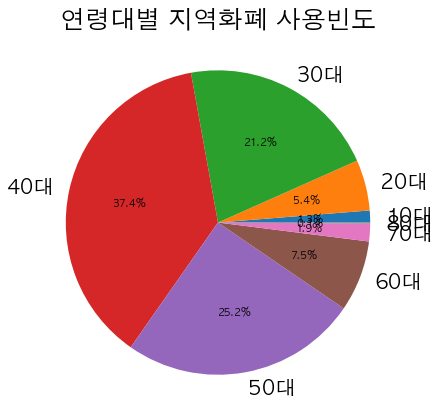

In [89]:
Pie_AGE(부천시2)
Pie_AGE(화성시2)
Pie_AGE(군포시2)
Pie_AGE(하남시2)
Pie_AGE(양평군2)

### 지역별로 지역화폐 종류 빈도 테이블, 파이그래프를 그려주는 함수

In [32]:
def Freq_table(지역2):
    C=Counter(지역2['Category'])
    pair=C.most_common()
    print('Category','\tFrequency')
    for x in pair:
        print('{0}\t{1}'.format(x[0],x[1])) #\t : 탭 간격

In [33]:
Freq_table(부천시2) # 부천시에서 사용한 지역화폐 종류별 행 개수의 총합 (빈도수 합 아님))

Category 	Frequency
부천페이	49
군포愛머니	30
하남하머니	14
수원페이	4
Thank You Pay-N	3
광명사랑화폐	3
의정부사랑카드	3
고양페이카드	2
용인와이페이	2
광주사랑카드	2
양주사랑카드	2
안산사랑상품권 다온	1
이천사랑지역화폐	1
파주 Pay(파주페이)	1
행복화성지역화폐	1
양평통보	1


In [34]:
def Pie_plot(지역2):
    DATA=np.array(지역2['Category'])
    C=Counter(DATA)
    pair=C.most_common()
    pair_t=np.array(pair).T #transpose
    freq=pair_t[1]
    index=pair_t[0]
    plt.rc('legend', fontsize=15) 
    plt.figure(figsize = (15,7))
    plt.pie(freq,labels=index,autopct='%.1f%%')
    plt.title('지역화폐 종류별 사용빈도', size=25)
    plt.legend(loc=(1.5, 0))
    plt.show()

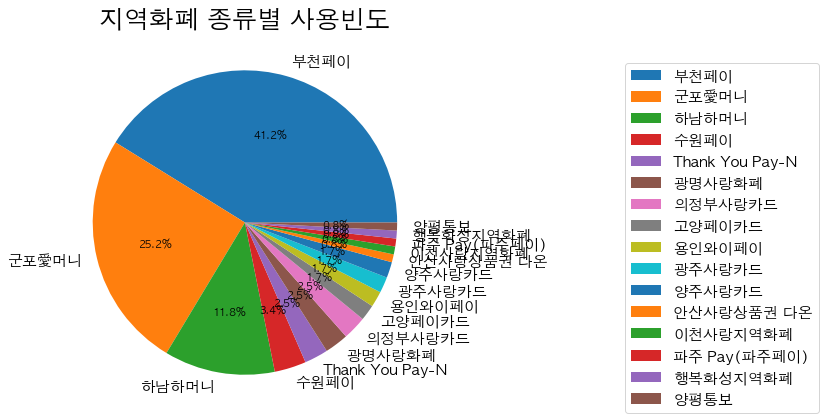

In [35]:
Pie_plot(부천시2)

In [98]:
def countplot(지역2):
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.figure(figsize = (12,10))
    plt.rc('xtick', labelsize=17)
    plt.rc('ytick', labelsize=17)
    plt.title('지역화폐 종류별 사용빈도', size=25)
    sns.countplot(y = 'Category', data = 지역2, order = 지역2['Category'].value_counts().index)
    plt.show()

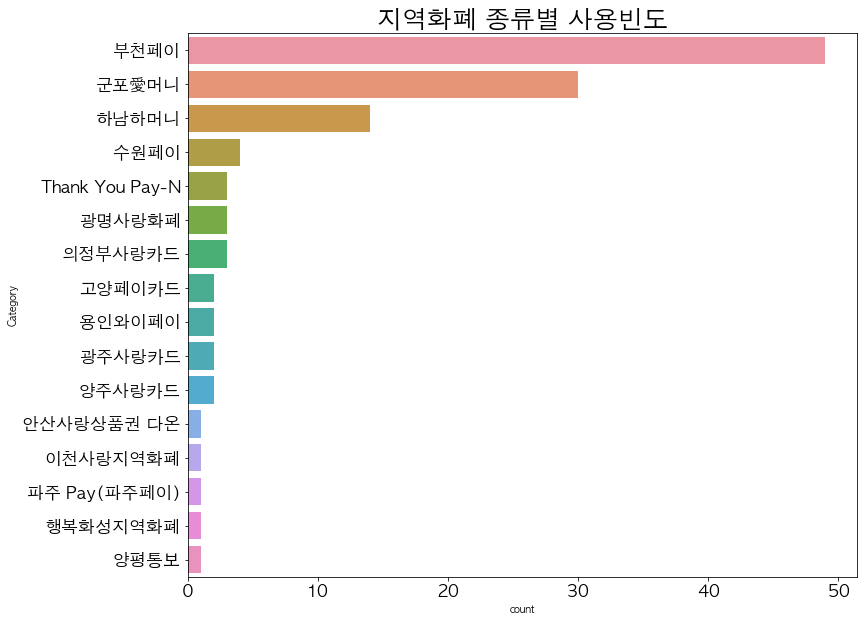

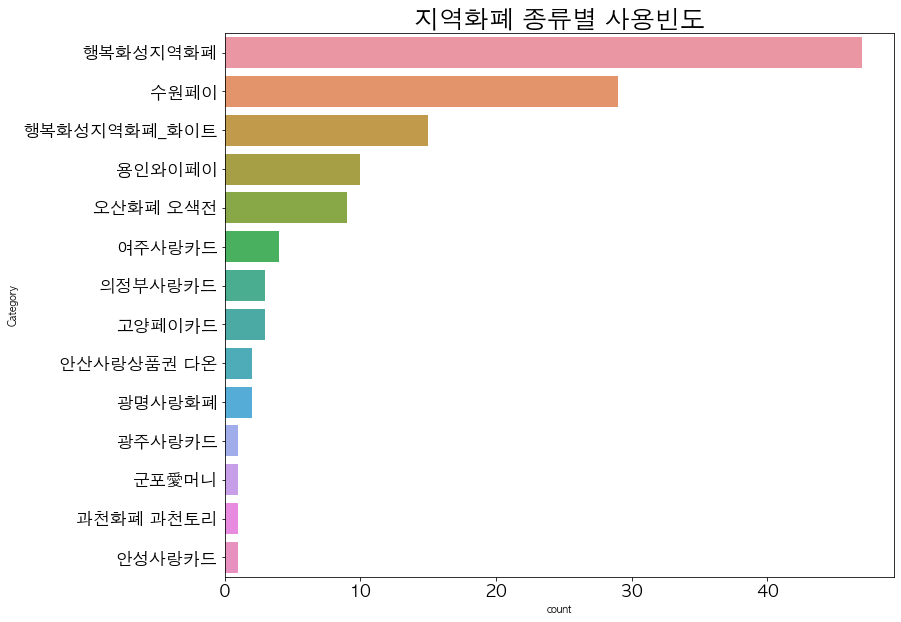

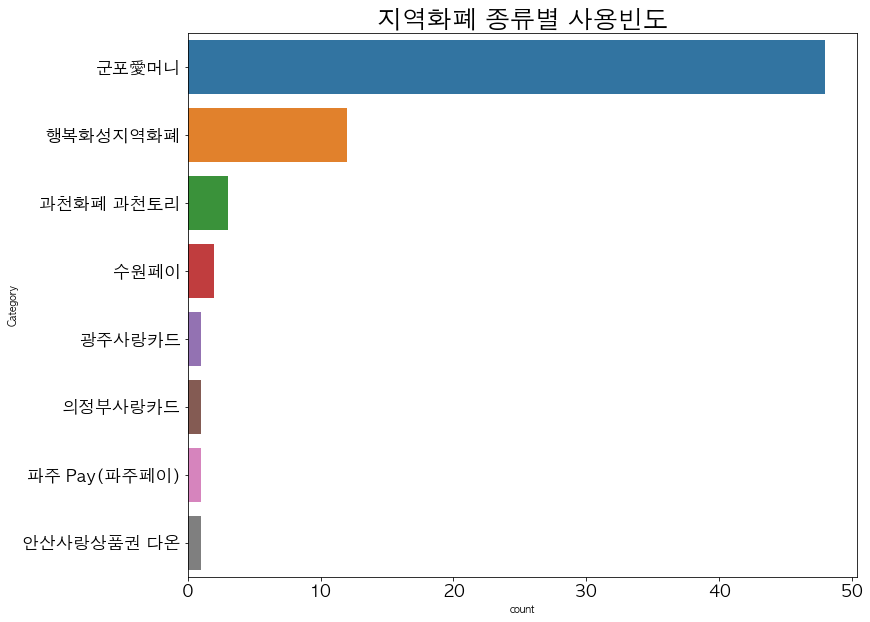

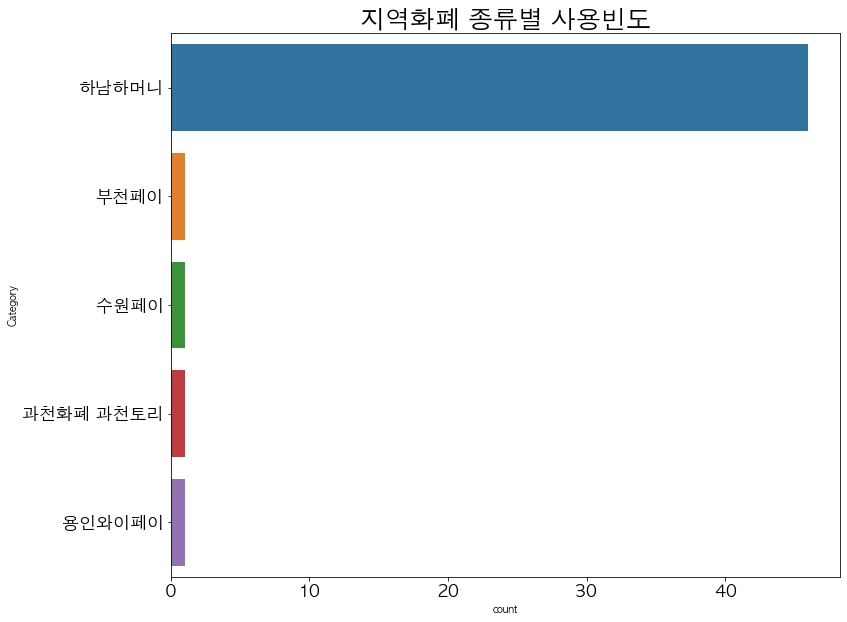

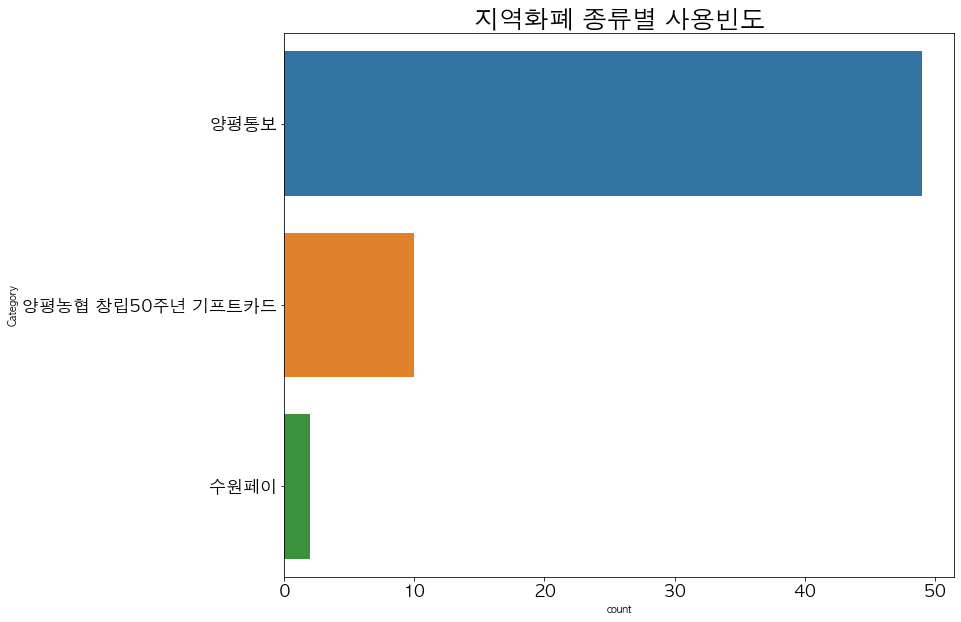

In [99]:
countplot(부천시2)
countplot(화성시2)
countplot(군포시2)
countplot(하남시2)
countplot(양평군2)

### 지역화폐 종류별 나이별 빈도수 테이블

In [37]:
양주사랑카드=Freq[Freq.Category == '양주사랑카드']
가평사랑상품권=Freq[Freq.Category == '가평사랑상품권']
고양페이카드=Freq[Freq.Category == '고양페이카드']
수원페이=Freq[Freq.Category == '수원페이']
안산사랑상품권_다온=Freq[Freq.Category == '안산사랑상품권 다온']
과천화폐_과천토리=Freq[Freq.Category == '과천화폐 과천토리']
의정부사랑카드=Freq[Freq.Category == '의정부사랑카드']
용인와이페이=Freq[Freq.Category == '용인와이페이']
부천페이=Freq[Freq.Category == '부천페이']
Thank=Freq[Freq.Category == 'Thank You Pay-N']
파주pay=Freq[Freq.Category == '파주 Pay(파주페이)']
행복화성지역화폐=Freq[Freq.Category == '행복화성지역화폐']
광명사랑화폐=Freq[Freq.Category == '광명사랑화폐']
여주사랑카드=Freq[Freq.Category == '여주사랑카드']
하남하머니=Freq[Freq.Category == '하남하머니']
오산화폐_오색전=Freq[Freq.Category == '오산화폐 오색전']
광주사랑카드=Freq[Freq.Category == '광주사랑카드']
양평통보=Freq[Freq.Category == '양평통보']
군포愛머니=Freq[Freq.Category == '군포愛머니']
동두천사랑카드=Freq[Freq.Category == '동두천사랑카드']
이천사랑지역화페=Freq[Freq.Category == '이천사랑지역화폐']
안성사랑카드=Freq[Freq.Category == '안성사랑카드']
구리사랑카드=Freq[Freq.Category == '구리사랑카드']
연천사랑상품권=Freq[Freq.Category == '연천사랑상품권']
행복화성지역화폐_화이트=Freq[Freq.Category == '행복화성지역화폐_화이트']
양평농립=Freq[Freq.Category == '양평농협 창립50주년 기프트카드']

### 상위 다섯 지역에서 가장 많이 사용되는 지역화폐의 연령별 사용빈도 테이블 및 막대그래프

In [38]:
부천페이2=부천시2[부천시2['Category']=='부천페이']

행복화성지역화폐2=화성시2[화성시2['Category']=='행복화성지역화폐']

군포愛머니2=군포시2[군포시2['Category']=='군포愛머니']

하남하머니2=하남시2[하남시2['Category']=='하남하머니']

양평통보2=양평군2[양평군2['Category']=='양평통보']

과천토리2=안양시동안구2[안양시동안구2['Category']=='과천화폐 과천토리']

행복화성지역화폐3=성남시수정구2[성남시수정구2['Category']=='행복화성지역화폐']

고양페이2=김포시2[김포시2['Category']=='고양페이카드']

의정부사랑카드2=의왕시2[의왕시2['Category']=='의정부사랑카드']

수원페이2=성남시중원구2[성남시중원구2['Category']=='수원페이']

In [39]:
def Age_Freq(data):
    Age10=sum(data[data['Age']==10].Frequency)
    Age20=sum(data[data['Age']==20].Frequency)
    Age30=sum(data[data['Age']==30].Frequency)
    Age40=sum(data[data['Age']==40].Frequency)
    Age50=sum(data[data['Age']==50].Frequency)
    Age60=sum(data[data['Age']==60].Frequency)
    Age70=sum(data[data['Age']==70].Frequency)
    Age80=sum(data[data['Age']==80].Frequency)
    연령별빈도=pd.DataFrame({'Age':[10,20,30,40,50,60,70,80],'Total':[Age10,Age20,
                            Age30,Age40,Age50,Age60,Age70,Age80]})
    return 연령별빈도

In [40]:
def Age_bar(data):
    plt.figure(figsize=(13,7))
    plt.bar(data.Age, data.Total, color='b', width=7)
    plt.show()

In [41]:
Age_부천페이2=Age_Freq(부천페이2)
Age_행복화성지역화폐2=Age_Freq(행복화성지역화폐2) 
Age_군포愛머니2=Age_Freq(군포愛머니2)
Age_하남하머니2=Age_Freq(하남하머니2)
Age_양평통보2=Age_Freq(양평통보2)

Age_과천토리2=Age_Freq(과천토리2)
Age_행복화성지역화폐3=Age_Freq(행복화성지역화폐3)
Age_고양페이2=Age_Freq(고양페이2)
Age_의정부사랑카드2=Age_Freq(의정부사랑카드2)
Age_수원페이2=Age_Freq(수원페이2)

In [42]:
Age_부천페이2

,Age,Total
0,10,3458
1,20,49624
2,30,119968
3,40,154424
4,50,88259
5,60,28742
6,70,3258
7,80,513


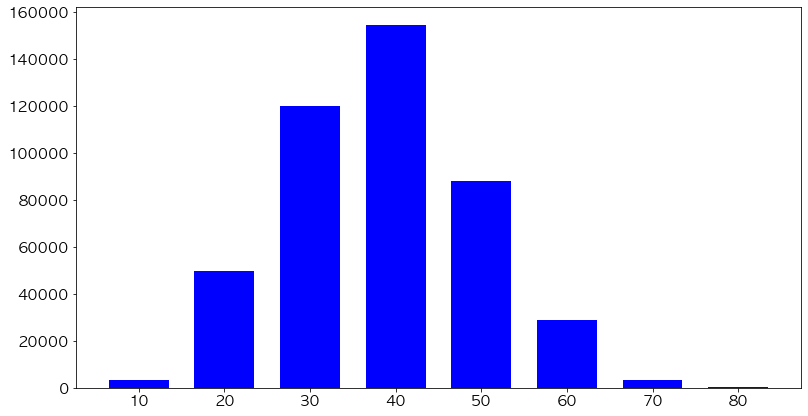

In [43]:
Age_bar(Age_부천페이2)

## 결제금액 상위 다섯 지역 지도 마커표시 및 지역화폐 이미지 출력

In [44]:
import folium
import json
import base64

In [86]:
stat_geo="LARD_ADM_SECT_SGG_41.zip.geojson"
stat_geo1=json.load(open(stat_geo,encoding='utf-8'))
m = folium.Map(location=[37.3392646, 127.2148919],
               zoom_start=8.5, 
               width=750, 
               height=500
              )

# 결제금액 상위 다섯지역
pic = base64.b64encode(open('부천페이.png','rb').read()).decode()
image_tag = '<img src="data:image/jpeg;base64,{}">'.format(pic)
iframe = folium.IFrame(image_tag, width=300, height=320)
popup = folium.Popup(iframe, max_width=200)
folium.Marker([37.5034138,126.7660309],
              popup=popup,
              tooltip="부천페이",
             icon=folium.Icon('red', icon='star')).add_to(m)
    
pic2 = base64.b64encode(open('화성시.png','rb').read()).decode()
image_tag2 = '<img src="data:image/jpeg;base64,{}">'.format(pic2)
iframe2 = folium.IFrame(image_tag2, width=300, height=320)
popup2 = folium.Popup(iframe2, max_width=200)
folium.Marker([37.1994932,126.8311887],
              popup=popup2,
              tooltip="행복화성지역화폐",
             icon=folium.Icon('red', icon='star')).add_to(m)

pic3 = base64.b64encode(open('군포애머니.jpg','rb').read()).decode()
image_tag3 = '<img src="data:image/jpeg;base64,{}">'.format(pic3)
iframe3 = folium.IFrame(image_tag3, width=300, height=320)
popup3 = folium.Popup(iframe3, max_width=200)
folium.Marker([37.3616703,126.9351741],
              popup=popup3,
              tooltip="군포愛머니",
             icon=folium.Icon('red', icon='star')).add_to(m)

pic4 = base64.b64encode(open('하남하머니.jpg','rb').read()).decode()
image_tag4 = '<img src="data:image/jpeg;base64,{}">'.format(pic4)
iframe4 = folium.IFrame(image_tag4, width=300, height=320)
popup4 = folium.Popup(iframe4, max_width=200)
folium.Marker([37.5392646, 127.2148919],
              popup=popup4,
              tooltip="하남하머니",
             icon=folium.Icon('red', icon='star')).add_to(m)

pic5 = base64.b64encode(open('양평통보.jpg','rb').read()).decode()
image_tag5 = '<img src="data:image/jpeg;base64,{}">'.format(pic5)
iframe5 = folium.IFrame(image_tag5, width=300, height=320)
popup5 = folium.Popup(iframe5, max_width=200)
folium.Marker([37.4912195, 127.4875607],
              popup=popup5,
              tooltip="양평통보",
             icon=folium.Icon('red', icon='star')).add_to(m)


folium.GeoJson(stat_geo1, name='지역구').add_to(m)

m

In [87]:
m = folium.Map(location=[37.3392646, 127.2148919],
               zoom_start=8.5, 
               width=750, 
               height=500
              )
# 상위 다섯지역
folium.Marker([37.3823140,127.119613],
              popup='성남시 분당구',
              tooltip=format(성남시분당구인구,','),
             icon=folium.Icon('blue', icon='star')).add_to(m)

folium.Marker([37.5034138,126.7660309],
              popup='부천시',
              tooltip=format(부천시인구,','),
             icon=folium.Icon('blue', icon='star')).add_to(m)

folium.Marker([37.1994932,126.8311887],
              popup='화성시',
              tooltip=format(화성시인구,','),
             icon=folium.Icon('blue', icon='star')).add_to(m)

folium.Marker([37.6360028,127.2165279],
              popup='남양주시',
              tooltip=format(남양주시인구,','),
             icon=folium.Icon('blue', icon='star')).add_to(m)

folium.Marker([36.9921075,127.1129451],
              popup='평택시',
              tooltip=format(평택시인구,','),
             icon=folium.Icon('blue', icon='star')).add_to(m)

folium.GeoJson(stat_geo1).add_to(m)
m

## 군집분석

In [48]:
cc=시군구별총금액.drop(['Province'],axis=1)

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = pd.DataFrame(sc.fit_transform(cc))
cc_scaled.columns = ['Total', 'Population', '0~9', '10~19', '20~29', '30~39', '40~49',
       '50~59', '60~69', '70~79', '80~89', '90~99']
cc_scaled.head()

,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
0,-0.622243,-1.408675,-1.243499,-1.392878,-1.507849,-1.352047,-1.402544,-1.427022,-1.256020,-1.218387,-1.144840,-1.173476
1,0.503874,0.840262,0.538137,0.522488,0.843422,0.690285,0.719810,1.011943,1.025047,1.347891,1.614780,1.391146
2,0.299281,-0.098244,-0.321249,-0.071174,0.098159,-0.247270,-0.050552,0.086282,-0.217886,-0.269478,0.133825,0.200038
3,0.226338,-0.071218,-0.208254,0.167561,0.030613,-0.305374,-0.006692,0.096559,-0.294294,-0.217170,0.261262,0.041345
4,-0.412115,-1.431657,-1.198018,-1.316213,-1.430373,-1.290518,-1.368954,-1.475776,-1.523649,-1.596093,-1.611395,-1.425196


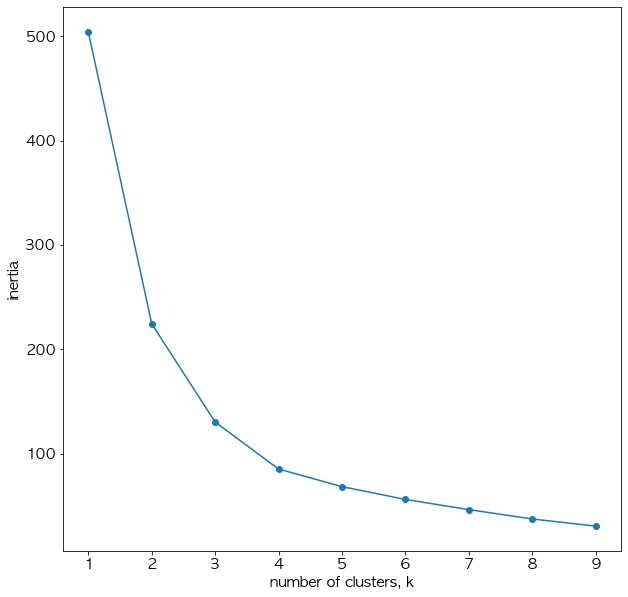

In [50]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cc_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(10, 10))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k', size=15)
plt.ylabel('inertia', size=15)
plt.xticks(ks)
plt.show()

In [51]:
#cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(cc_scaled)

In [52]:
#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기 
cc_scaled['cluster'] = clusters.labels_

In [53]:
#cluster를 기준으로 데이터 개수 세기
cc_scaled.groupby('cluster').count()

,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
cluster,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,14,14
1,17,17,17,17,17,17,17,17,17,17,17,17
2,3,3,3,3,3,3,3,3,3,3,3,3
3,8,8,8,8,8,8,8,8,8,8,8,8


In [54]:
#그룹별 특징을 알아보자! -그룹별 평균값
pd.options.display.float_format = '{:.3f}'.format
cc_scaled.groupby('cluster').mean()

,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
cluster,,,,,,,,,,,,
0,-0.408,-0.954,-0.859,-0.953,-0.983,-0.904,-0.958,-0.957,-0.861,-0.847,-0.836,-0.849
1,0.095,-0.066,-0.122,-0.053,0.024,-0.073,-0.062,-0.026,-0.098,-0.181,-0.207,-0.185
2,2.304,2.602,2.536,2.511,2.414,2.554,2.549,2.521,2.658,2.446,2.331,2.251
3,-0.352,0.834,0.811,0.839,0.764,0.779,0.854,0.785,0.717,0.950,1.029,1.036


In [55]:
from sklearn.decomposition import PCA
X = cc_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)

In [56]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pd.options.display.float_format = '{:.4f}'.format
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = cc_scaled['cluster']
pca_df.head()

,0,1,cluster
0,-4.5671,0.0165,0
1,3.5871,-0.6234,3
2,-0.2003,0.2846,1
3,-0.1389,0.1999,1
4,-4.8569,0.2448,0


In [57]:
시군구별총금액

,Province,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99
0,가평군,301280520,62415,3607,4857,6174,5992,8097,11668,11209,6793,3479,494
1,고양시 덕양구,2628753401,466157,38863,42557,62288,66204,78358,81204,51362,29459,13765,1900
2,고양시 일산동구,2205897582,297671,21857,30872,44502,38563,52855,54813,29483,15174,8245,1247
3,고양시 일산서구,2055138722,302523,24093,35571,42890,36850,54307,55106,28138,15636,8720,1160
4,과천시,735576880,58289,4507,6366,8023,7806,9209,10278,6498,3457,1740,356
5,광명시,1823050823,316552,25724,33063,40950,45227,55010,52573,37128,18178,7485,1074
6,광주시,633876864,372654,36223,33577,43885,59830,64543,61520,43558,20728,7573,1123
7,구리시,721942796,199265,16345,19116,27505,27578,33603,35905,22583,11399,4555,604
8,군포시,6482165208,275852,22602,28069,38214,39877,45760,48316,30212,14536,7098,1100
9,김포시,182000,437221,52071,44797,47422,71134,80358,62744,43857,23886,9519,1367


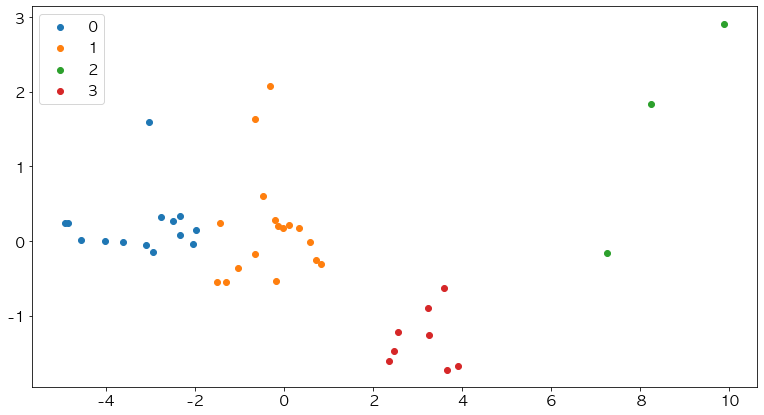

In [58]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False #한글, 부호 깨질때
plt.figure(figsize=(13,7))

for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [59]:
cc_join= pd.concat([시군구별총금액.Province,cc_scaled], axis=1)
cc_join.head()

,Province,Total,Population,0~9,10~19,20~29,30~39,40~49,50~59,60~69,70~79,80~89,90~99,cluster
0,가평군,-0.6222,-1.4087,-1.2435,-1.3929,-1.5078,-1.3520,-1.4025,-1.4270,-1.2560,-1.2184,-1.1448,-1.1735,0
1,고양시 덕양구,0.5039,0.8403,0.5381,0.5225,0.8434,0.6903,0.7198,1.0119,1.0250,1.3479,1.6148,1.3911,3
2,고양시 일산동구,0.2993,-0.0982,-0.3212,-0.0712,0.0982,-0.2473,-0.0506,0.0863,-0.2179,-0.2695,0.1338,0.2000,1
3,고양시 일산서구,0.2263,-0.0712,-0.2083,0.1676,0.0306,-0.3054,-0.0067,0.0966,-0.2943,-0.2172,0.2613,0.0413,1
4,과천시,-0.4121,-1.4317,-1.1980,-1.3162,-1.4304,-1.2905,-1.3690,-1.4758,-1.5236,-1.5961,-1.6114,-1.4252,0


In [60]:
newdf = cc_join.groupby(['cluster','Province'], as_index=False).count()[['cluster', 'Province']]
newdf

,cluster,Province
0,0,가평군
1,0,과천시
2,0,구리시
3,0,동두천시
4,0,성남시 중원구
5,0,수원시 팔달구
6,0,안성시
7,0,양평군
8,0,여주시
9,0,연천군
